In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

data = "C:/Programación/Lab Intermedio/Oscilador Torsional/Datos Calibración_Oscilador Torsional.xlsx"
data = pd.read_excel(data)
print(data)

   Desplazamiento (Rad)  VPP (V)  Incertidumbre desplazamiento (Rad)  \
0                   0.1     0.13                                0.01   
1                   0.2     0.24                                0.01   
2                   0.3     0.34                                0.01   
3                   0.4     0.44                                0.01   
4                   0.5     0.54                                0.01   
5                   0.6     0.64                                0.01   
6                   0.7     0.78                                0.01   
7                   0.8     0.84                                0.01   
8                   0.9     0.90                                0.01   
9                   1.0     1.00                                0.01   

   Incertidumbre VPP (V)  
0                  0.001  
1                  0.001  
2                  0.001  
3                  0.001  
4                  0.001  
5                  0.001  
6                 

In [25]:
x,y=np.array(data['Desplazamiento (Rad)']), np.array(data['VPP (V)'])

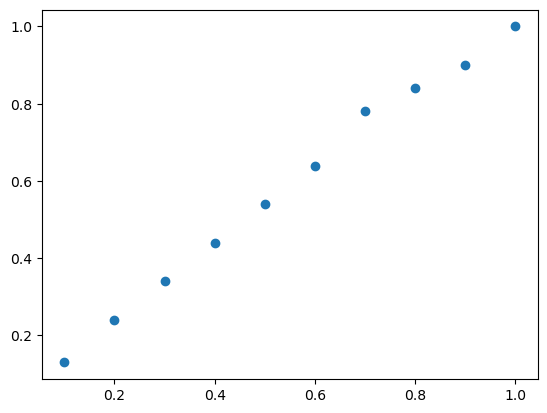

In [26]:
plt.scatter(x, y)

In [27]:
param, cov= scipy.optimize.curve_fit(lambda t,a,b: a*t+b,  x,y)
incert =np.sqrt(np.diag(cov))

In [61]:
param, incert

(array([0.9739394 , 0.04933333]), array([0.02489279, 0.01544557]))

In [31]:
X=np.linspace(x[0], x[-1], 1000)
Y=param[0]*X+param[1]

Text(0.5, 1.0, 'Regresión Lineal-Desplazamiento (rad) vs. VPP (V)')

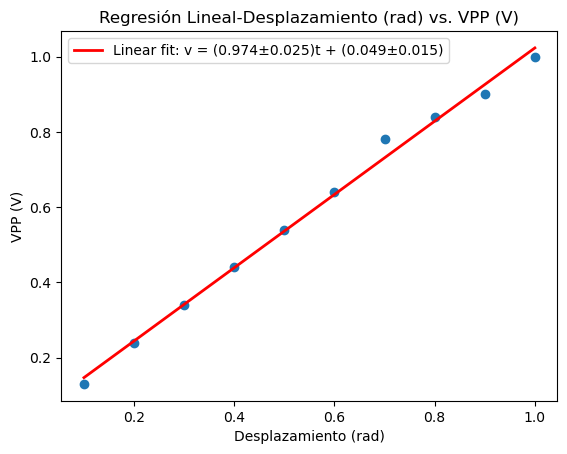

In [67]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(X, Y, color='red', linewidth=2, 
        label=f'Linear fit: v = ({np.round(param[0], 3)}±{np.round(incert[0],3)})t + ({np.round(param[1],3)}±{np.round(incert[1],3)})')
#plt.legend(['Regresión Lineal: Intercepto '])
ax.legend(loc='upper left')
ax.set_xlabel('Desplazamiento (rad)')
ax.set_ylabel('VPP (V)')
ax.set_title('Regresión Lineal-Desplazamiento (rad) vs. VPP (V)')